In [ ]:
##Should i invest or not 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
df.head(5)


,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2024-11-30,2025-01-31,2025-10-31
0,102001,0,United States,country,NaN,2024-10-31,0.2,0.6,2.9
1,394913,1,"New York, NY",msa,NY,2024-10-31,0.3,0.5,1.5
2,753899,2,"Los Angeles, CA",msa,CA,2024-10-31,0.2,0.4,2.3
3,394463,3,"Chicago, IL",msa,IL,2024-10-31,0.1,0.2,1.1
4,394514,4,"Dallas, TX",msa,TX,2024-10-31,-0.2,-0.7,1.2


In [2]:
df.tail(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2024-11-30,2025-01-31,2025-10-31
890,753929,935,"Zapata, TX",msa,TX,2024-10-31,-0.8,-2.6,-7.2
891,394743,936,"Ketchikan, AK",msa,AK,2024-10-31,0.2,0.1,-0.9
892,753874,937,"Craig, CO",msa,CO,2024-10-31,0.4,1.0,4.4
893,395188,938,"Vernon, TX",msa,TX,2024-10-31,-1.4,-2.2,-4.3
894,394767,939,"Lamesa, TX",msa,TX,2024-10-31,-0.2,-0.7,-4.5


In [3]:
df.dtypes


RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
BaseDate       object
2024-11-30    float64
2025-01-31    float64
2025-10-31    float64
dtype: object

In [4]:
df.shape

(895, 9)

In [5]:
df.count() 

RegionID      895
SizeRank      895
RegionName    895
RegionType    895
StateName     894
BaseDate      895
2024-11-30    895
2025-01-31    895
2025-10-31    895
dtype: int64

In [6]:
df = df.drop_duplicates()
df.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2024-11-30,2025-01-31,2025-10-31
0,102001,0,United States,country,NaN,2024-10-31,0.2,0.6,2.9
1,394913,1,"New York, NY",msa,NY,2024-10-31,0.3,0.5,1.5
2,753899,2,"Los Angeles, CA",msa,CA,2024-10-31,0.2,0.4,2.3
3,394463,3,"Chicago, IL",msa,IL,2024-10-31,0.1,0.2,1.1
4,394514,4,"Dallas, TX",msa,TX,2024-10-31,-0.2,-0.7,1.2


In [7]:
df.count()

RegionID      895
SizeRank      895
RegionName    895
RegionType    895
StateName     894
BaseDate      895
2024-11-30    895
2025-01-31    895
2025-10-31    895
dtype: int64

In [8]:
# We have determined that there are duplicates  so lets check for null values 
print(df.isnull().sum())

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     1
BaseDate      0
2024-11-30    0
2025-01-31    0
2025-10-31    0
dtype: int64


In [9]:
df = df.dropna()    # Dropping the missing values.
df.count()

RegionID      894
SizeRank      894
RegionName    894
RegionType    894
StateName     894
BaseDate      894
2024-11-30    894
2025-01-31    894
2025-10-31    894
dtype: int64

In [10]:
print(df.isnull().sum()) 

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
BaseDate      0
2024-11-30    0
2025-01-31    0
2025-10-31    0
dtype: int64


In [11]:
# Step 1: Select growth metric columns for analysis
growth_columns = ['2024-11-30', '2025-01-31', '2025-10-31']

# Step 2: Add new columns for analysis
# Calculate variance for stability of growth
df['GrowthVariance'] = df[growth_columns].var(axis=1)

# Calculate growth acceleration (difference between end and start period)
df['GrowthAcceleration'] = df['2025-10-31'] - df['2024-11-30']

# Step 3: Highlight regions based on conditions
# Define thresholds for stability and acceleration
stability_threshold = 0.05  # Example: variance < 0.05 for stable growth
acceleration_threshold = 0.02  # Example: acceleration > 0.02 for positive growth

# Identify stable growth regions
stable_regions = df[df['GrowthVariance'] < stability_threshold]

# Identify accelerating growth regions
accelerating_regions = df[df['GrowthAcceleration'] > acceleration_threshold]

# Step 4: Display summaries
print("Stable Regions:")
print(stable_regions[['RegionName', 'StateName', 'GrowthVariance']].sort_values(by='GrowthVariance').head())

Stable Regions:
          RegionName StateName  GrowthVariance
16   Minneapolis, MN        MN    1.155558e-33
513   Starkville, MS        MS    4.622232e-33
491    Red Bluff, CA        CA    3.333333e-03
315     Bismarck, ND        ND    3.333333e-03
826       Deming, NM        NM    1.000000e-02


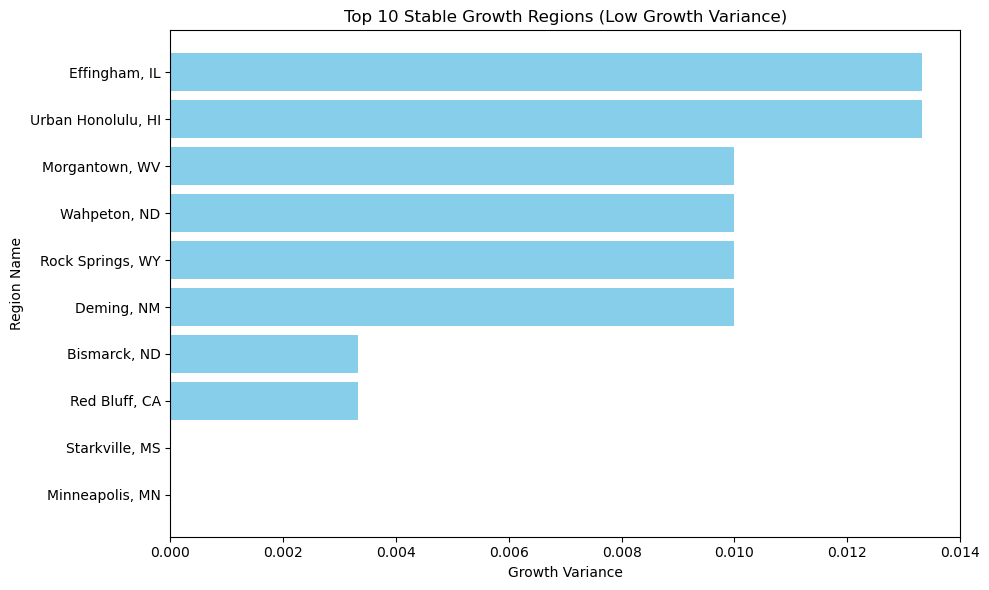

In [12]:
plt.figure(figsize=(10, 6))
stable_regions_sorted = stable_regions.sort_values(by='GrowthVariance', ascending=True)
plt.barh(stable_regions_sorted['RegionName'][:10], stable_regions_sorted['GrowthVariance'][:10], color='skyblue')
plt.xlabel('Growth Variance')
plt.ylabel('Region Name')
plt.title('Top 10 Stable Growth Regions (Low Growth Variance)')
plt.tight_layout()
plt.show()

Hot Regions:
             RegionName StateName  GrowthVariance
301      Morgantown, WV        WV        0.010000
845        Wahpeton, ND        ND        0.010000
54   Urban Honolulu, HI        HI        0.013333
746       Effingham, IL        IL        0.013333
708      Lock Haven, PA        PA        0.013333
Hot Regions:
             RegionName StateName  GrowthVariance
301      Morgantown, WV        WV        0.010000
845        Wahpeton, ND        ND        0.010000
54   Urban Honolulu, HI        HI        0.013333
746       Effingham, IL        IL        0.013333
708      Lock Haven, PA        PA        0.013333


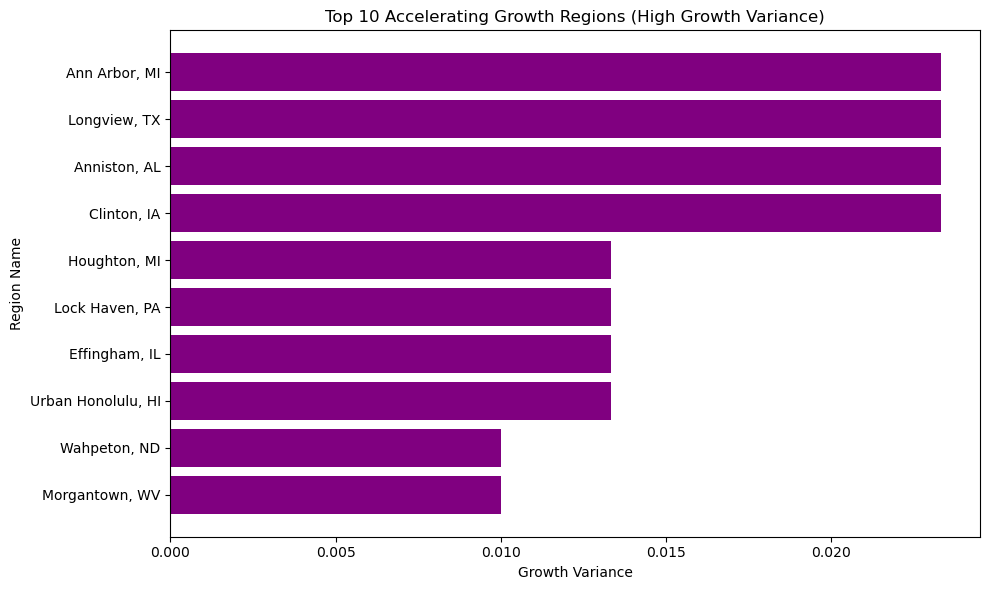

In [14]:
# Filter the regions with accelerating growth (positive acceleration)
accelerating_regions = df[df['GrowthAcceleration'] > acceleration_threshold]

# Print top regions with low growth variance
print("Hot Regions:")
print(accelerating_regions[['RegionName', 'StateName', 'GrowthVariance']].sort_values(by='GrowthVariance').head())


# Filter the regions with accelerating growth (positive acceleration)
accelerating_regions = df[df['GrowthAcceleration'] > acceleration_threshold]

# Print top regions with high growth variance
print("Hot Regions:")
print(accelerating_regions[['RegionName', 'StateName', 'GrowthVariance']].sort_values(by='GrowthVariance').head())

# Plot top 10 accelerating regions with low growth variance
plt.figure(figsize=(10, 6))
accelerating_regions_sorted = accelerating_regions.sort_values(by='GrowthVariance', ascending=True)
plt.barh(accelerating_regions_sorted['RegionName'][:10], accelerating_regions_sorted['GrowthVariance'][:10], color='purple')
plt.xlabel('Growth Variance')
plt.ylabel('Region Name')
plt.title('Top 10 Accelerating Growth Regions (High Growth Variance)')
plt.tight_layout()
plt.show()

